In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import regularizers
from keras.layers.core import Dropout

In [2]:
df = pd.read_csv('C:/Emojent/Tutorials/Deep Learning/data.csv')
df.head()

,"(0, 0)","(0, 1)","(0, 2)","(0, 3)","(0, 4)","(0, 5)","(0, 6)","(0, 7)","(0, 8)","(0, 9)",...,"(47, 39)","(47, 40)","(47, 41)","(47, 42)","(47, 43)","(47, 44)","(47, 45)","(47, 46)","(47, 47)",emotion
0,24,10,13,16,8,12,17,22,29,24,...,89,137,145,142,144,149,150,153,156,anger
1,17,10,16,15,7,11,15,22,28,19,...,90,136,145,145,147,149,151,153,156,anger
2,27,13,10,15,11,8,14,17,29,24,...,83,128,144,142,144,145,148,152,156,anger
3,36,32,17,15,17,20,29,45,58,70,...,15,0,0,0,9,61,129,140,142,anger
4,31,39,19,16,19,22,27,35,48,66,...,9,0,0,1,13,64,131,140,143,anger


In [3]:
df.shape

(981, 2305)

In [5]:
x = df.drop(['emotion'], axis=1)
x = np.array(x)
print(x)

[[ 24  10  13 ... 150 153 156]
 [ 17  10  16 ... 151 153 156]
 [ 27  13  10 ... 148 152 156]
 ...
 [ 52  33   6 ...  76  77  76]
 [ 32   8   4 ...  77  76  76]
 [ 45  20   4 ...  76  75  75]]


In [6]:
#replace categorical data with numerical:
df['emotion'].replace(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise'],
                     [0, 1, 2, 3, 4, 5, 6], inplace=True)
y = df['emotion']
y = np.array(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=196)
#get rid of any imposed order
y_train, x_train = shuffle(y_train, x_train)
y_test, x_test = shuffle(y_test, x_test)

In [8]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [9]:
print(x_train.shape)

(784, 2304)


In [282]:
#creating the model:
model = Sequential()

In [283]:
model.add(tf.keras.layers.Flatten()) # input layer
model.add(Dense(128, activation='relu')) # hidden layer 1

model.add(Dense(128, activation='relu')) # hidden layer 2


model.add(Dense(7, activation='softmax')) # output layer

In [284]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [285]:
model.fit(x_train, y_train, epochs=17, shuffle=True)

Epoch 1/17
25/25 [==============================] - 0s 3ms/step - loss: 1.8460 - accuracy: 0.2538
Epoch 2/17
25/25 [==============================] - 0s 3ms/step - loss: 1.7627 - accuracy: 0.2844
Epoch 3/17
25/25 [==============================] - 0s 3ms/step - loss: 1.6594 - accuracy: 0.4298
Epoch 4/17
25/25 [==============================] - 0s 3ms/step - loss: 1.4906 - accuracy: 0.5115
Epoch 5/17
25/25 [==============================] - 0s 3ms/step - loss: 1.3112 - accuracy: 0.5293
Epoch 6/17
25/25 [==============================] - 0s 3ms/step - loss: 1.1697 - accuracy: 0.5765
Epoch 7/17
25/25 [==============================] - 0s 3ms/step - loss: 1.0675 - accuracy: 0.6250
Epoch 8/17
25/25 [==============================] - 0s 3ms/step - loss: 0.9517 - accuracy: 0.6747
Epoch 9/17
25/25 [==============================] - 0s 3ms/step - loss: 0.8582 - accuracy: 0.7054
Epoch 10/17
25/25 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.7258
Epoch 11/17
25/25 [

In [286]:
#validation:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

7/7 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7919
0.5612150430679321 0.7918781638145447


In [254]:
#create a matrix for displaying the image
count = 0
matrix = []
for i in range(48):
    new_arr = []
    matrix.append(new_arr)
    for j in range(48):
        matrix[i].append(x_test[0][count])
        count +=1
        
matrix = np.array(matrix)
print(matrix)

[[0.00377773 0.00260533 0.00260533 ... 0.00690412 0.00807652 0.01485037]
 [0.00377773 0.00338693 0.00312639 ... 0.00586199 0.00651332 0.01224504]
 [0.00495012 0.00495012 0.00312639 ... 0.00586199 0.00599226 0.01172398]
 ...
 [0.01276611 0.01328718 0.01341744 ... 0.01498064 0.01550171 0.01537144]
 [0.01341744 0.01302664 0.01315691 ... 0.01758597 0.01472011 0.01537144]
 [0.01276611 0.01315691 0.01315691 ... 0.02865862 0.0178465  0.01511091]]


48


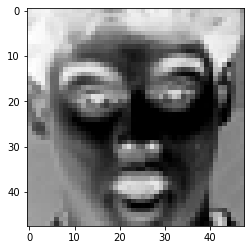

In [255]:
import matplotlib.pyplot as plt
import cv2

print(len(matrix))
plt.imshow(matrix, cmap=plt.cm.binary)
plt.show()




In [256]:
predictions = model.predict([x_test])
print(predictions)

Consider rewriting this model with the Functional API.
[[2.93283316e-04 3.25206574e-03 1.84411518e-04 ... 3.06458361e-07
  3.70182246e-02 9.58116949e-01]
 [3.34093779e-01 2.57867694e-01 7.12123215e-02 ... 1.80223323e-02
  1.27986476e-01 1.55234581e-03]
 [2.09505470e-05 1.15292589e-03 2.30748519e-05 ... 2.19441134e-07
  8.08933936e-03 9.90068614e-01]
 ...
 [3.06044094e-04 1.40037981e-03 1.72500927e-02 ... 9.37186897e-01
  1.30534725e-04 3.00423039e-06]
 [3.36928247e-03 2.71216363e-01 7.56689487e-03 ... 1.13993056e-01
  2.75725350e-02 1.77217871e-02]
 [1.88889861e-01 8.46265256e-03 7.06066668e-01 ... 3.31767797e-02
  2.89172735e-02 2.05757402e-04]]


In [257]:
print(np.argmax(predictions[0]))
rounded_preds = []
for prediction in predictions:
    rounded_preds.append(np.argmax(prediction))
    
print(rounded_preds)

6
[6, 0, 6, 6, 4, 6, 0, 6, 4, 2, 6, 6, 2, 0, 4, 0, 6, 2, 4, 6, 6, 0, 2, 4, 2, 6, 4, 1, 2, 3, 6, 4, 4, 0, 4, 2, 6, 5, 3, 1, 2, 2, 3, 3, 1, 0, 6, 2, 3, 6, 5, 3, 0, 1, 0, 6, 0, 2, 5, 4, 2, 2, 2, 5, 4, 3, 5, 3, 6, 1, 3, 6, 2, 0, 2, 2, 0, 6, 0, 6, 6, 0, 5, 6, 2, 6, 4, 2, 0, 2, 6, 0, 2, 6, 3, 2, 0, 5, 0, 4, 6, 0, 0, 2, 6, 1, 2, 2, 1, 6, 2, 5, 4, 6, 6, 2, 1, 2, 6, 6, 0, 0, 6, 6, 1, 0, 2, 6, 4, 4, 2, 0, 4, 2, 6, 6, 4, 4, 0, 6, 6, 0, 4, 0, 2, 2, 4, 2, 0, 6, 6, 4, 0, 2, 4, 5, 4, 4, 0, 4, 6, 6, 5, 3, 4, 2, 5, 2, 4, 6, 6, 2, 4, 0, 3, 4, 5, 4, 4, 2, 6, 2, 6, 6, 2, 4, 3, 5, 4, 4, 0, 2, 4, 6, 4, 3, 2]


[[0.00377773 0.00260533 0.00260533 ... 0.00690412 0.00807652 0.01485037]
 [0.00377773 0.00338693 0.00312639 ... 0.00586199 0.00651332 0.01224504]
 [0.00495012 0.00495012 0.00312639 ... 0.00586199 0.00599226 0.01172398]
 ...
 [0.01276611 0.01328718 0.01341744 ... 0.01498064 0.01550171 0.01537144]
 [0.01341744 0.01302664 0.01315691 ... 0.01758597 0.01472011 0.01537144]
 [0.01276611 0.01315691 0.01315691 ... 0.02865862 0.0178465  0.01511091]]


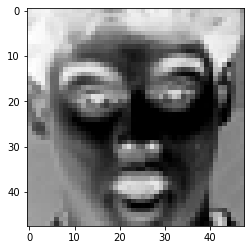

In [258]:
count = 0
matrix = []
for i in range(48):
    new_arr = []
    matrix.append(new_arr)
    for j in range(48):
        matrix[i].append(x_test[0][count])
        count +=1
        
matrix = np.array(matrix)
print(matrix)

plt.imshow(matrix, cmap=plt.cm.binary)
plt.show()

In [259]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true=y_test, y_pred=rounded_preds)

In [260]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], 
            horizontalalignment='center', 
            color="white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Precicted Label')

Confusion matrix, without normalization
[[20  0  8  0  0  2  0]
 [ 2  5  0  3  0  0  0]
 [ 6  0 30  4  0  0  0]
 [ 0  2  2  6  1  0  0]
 [ 0  0  2  0 36  0  0]
 [ 4  2  0  1  0  9  1]
 [ 0  0  1  0  0  2 48]]


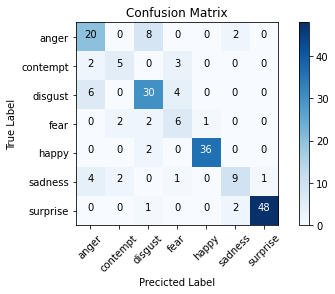

In [261]:
cm_plot_labels = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [266]:
from keras.wrappers.scikit_learn import KerasClassifier
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(128, activation='relu')) # hidden layer 1
    model.add(Dense(128, activation='relu')) # hidden layer 2
    model.add(Dense(7, activation='softmax')) # output layer
    #compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
    

In [267]:
from sklearn.model_selection import GridSearchCV
epochs = [10, 15, 50, 100]
params = dict(epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)

In [268]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.950240 using {'epochs': 100}


In [287]:
model = create_model()
model.fit(x_train, y_train, epochs=50, shuffle=True)

Epoch 1/50
25/25 [==============================] - 0s 3ms/step - loss: 1.8629 - accuracy: 0.2232
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 1.7836 - accuracy: 0.3380
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1.6912 - accuracy: 0.3967
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 1.5480 - accuracy: 0.4936
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 1.3602 - accuracy: 0.5446
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 1.2231 - accuracy: 0.5676
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0957 - accuracy: 0.6161
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0095 - accuracy: 0.6429
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.9273 - accuracy: 0.6658
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8397 - accuracy: 0.7168
Epoch 11/50
25/25 [

In [288]:
val_loss, val_acc = model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1748 - accuracy: 0.9492
